In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import os
import glob
import seaborn as sns
sns.set(style="darkgrid")
import sys
sys.path.append("../dsmuc/")
import dsmuc.io as io
import dsmuc.preprocessing as pp
import dsmuc.features as ff
import dsmuc.custom as cs


In [65]:
df_test = io.read_msb_2('/home/ahmet/notebooks/data/PT17_MxPD_preprocessed/PT17.0069_1.csv', 
              columns=['unix','accX', 'accY', 'accZ', 'gyrX', 'gyrY', 'gyrZ'])

In [66]:
df_test.head(20)

,unix,accX,accY,accZ,gyrX,gyrY,gyrZ
time,,,,,,,
1970-01-01 00:00:32.460,1.473491e+09,0.61743,0.26367,0.71729,0.00000,0.00000,0.00000
1970-01-01 00:00:32.460,1.473491e+09,0.62427,0.25855,0.71021,0.00000,0.00000,0.00000
1970-01-01 00:00:32.460,1.473491e+09,0.63208,0.25830,0.70923,0.00000,0.00000,0.00000
1970-01-01 00:00:32.460,1.473491e+09,0.62842,0.26270,0.71045,0.00000,0.00000,0.00000
1970-01-01 00:00:32.460,1.473491e+09,0.62549,0.27148,0.70508,0.00000,0.00000,0.00000
1970-01-01 00:00:32.460,1.473491e+09,0.62549,0.27148,0.70508,0.00000,0.00000,0.00000
1970-01-01 00:00:32.460,1.473491e+09,0.62549,0.27148,0.70508,0.00000,0.00000,0.00000
1970-01-01 00:00:32.460,1.473491e+09,0.62549,0.27148,0.70508,0.00000,0.00000,0.00000
1970-01-01 00:00:32.460,1.473491e+09,0.62549,0.27148,0.70508,0.00000,0.00000,0.00000


In [67]:
df_test.set_index(df_test.index.rename('date'),inplace = True)

In [68]:
df_test.head()

,unix,accX,accY,accZ,gyrX,gyrY,gyrZ
date,,,,,,,
1970-01-01 00:00:32.460,1.473491e+09,0.61743,0.26367,0.71729,0.0,0.0,0.0
1970-01-01 00:00:32.460,1.473491e+09,0.62427,0.25855,0.71021,0.0,0.0,0.0
1970-01-01 00:00:32.460,1.473491e+09,0.63208,0.25830,0.70923,0.0,0.0,0.0
1970-01-01 00:00:32.460,1.473491e+09,0.62842,0.26270,0.71045,0.0,0.0,0.0
1970-01-01 00:00:32.460,1.473491e+09,0.62549,0.27148,0.70508,0.0,0.0,0.0


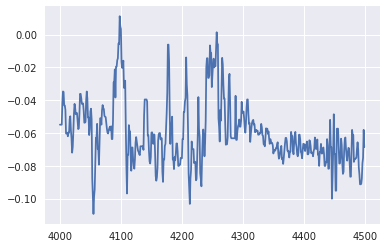

In [69]:
plt.plot(list(range(4000,4500)),df_test['accX'][4000:4500].values)

In [70]:
df_test.drop_duplicates(keep='last', inplace=True)

## Time correction 

In [71]:
def add_time(row):
    
    row ['new_date'] = int((row['unix']*1000) + float(str(row.name).rsplit(':',1)[1])*1000)
    return row

In [72]:
df_test_new = df_test.apply(add_time, axis=1)

In [73]:
df_test_new.columns = ['unix', 'accX', 'accY', 'accZ', 'gyrX', 'gyrY', 'gyrZ', 'date']

In [87]:
df_test_new= cs.create_datetime_index(df_test_new, 'date')

In [93]:
df = df_test_new
fs = 62.5
"""
Function to correct the timestamp of a DataFrame. When 5 or less samples have the same timestamp, it is assumed that
the last one is correct and multiples of 1/fs seconds are subtracted from the others.
:param df: The df whose timestamps you want corrected.
:return: Df with corrected timestamps.
"""
# find gaps
u, i, inv, counts = np.unique(df.index.values, return_counts=True, return_index=True, return_inverse=True)
new_index = []
delta_time = np.timedelta64(int(float(1/fs)*1000),'ms')
for x in range(i.shape[0]):
    for c in range(counts[x]): # treatment 1: if gap is large enough differentiate them by subtracting 16ms, 2*16ms etc.
        new_index.append(u[x] - delta_time * (counts[x] - (c + 1)))
#         else:
#             continue # TODO: treatment 2: is the gap is too small plot and find out why? We will have to discuss what to do about this case
# df.drop_duplicates(subset=['time'], inplace=True)

# black magic to append new index


In [94]:
new_index = pd.Series(new_index).rename('date')
df = df.reset_index().drop(columns=['date'])
new_df = pd.concat((df, new_index), axis=1)
new_df = new_df.set_index(new_df['date'])

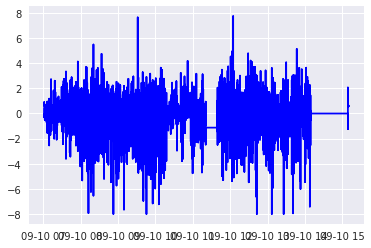

In [97]:
plt.plot( df_test_new['accX'], color = 'blue')
plt.show()

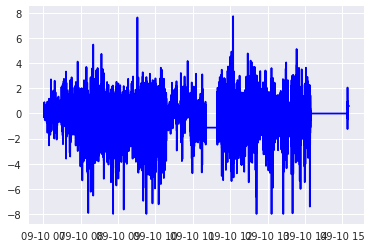

In [96]:
plt.plot( new_df['accX'], color = 'blue')

In [98]:
new_df

,unix,accX,accY,accZ,gyrX,gyrY,gyrZ,date
date,,,,,,,,
2016-09-10 07:01:12.956,1.473491e+09,0.61743,0.26367,0.71729,0.00000,0.00000,0.00000,2016-09-10 07:01:12.956
2016-09-10 07:01:12.972,1.473491e+09,0.62427,0.25855,0.71021,0.00000,0.00000,0.00000,2016-09-10 07:01:12.972
2016-09-10 07:01:12.988,1.473491e+09,0.63208,0.25830,0.70923,0.00000,0.00000,0.00000,2016-09-10 07:01:12.988
2016-09-10 07:01:13.004,1.473491e+09,0.62842,0.26270,0.71045,0.00000,0.00000,0.00000,2016-09-10 07:01:13.004
2016-09-10 07:01:13.020,1.473491e+09,0.62549,0.27148,0.70508,0.00000,0.00000,0.00000,2016-09-10 07:01:13.020
2016-09-10 07:01:13.036,1.473491e+09,0.61865,0.27564,0.70947,-27.89630,51.76830,-31.85980,2016-09-10 07:01:13.036
2016-09-10 07:01:13.052,1.473491e+09,0.62329,0.26929,0.71338,-0.79268,1.52439,0.60976,2016-09-10 07:01:13.052
2016-09-10 07:01:13.068,1.473491e+09,0.62012,0.26440,0.70996,-0.51829,1.40244,0.88415,2016-09-10 07:01:13.068
2016-09-10 07:01:13.084,1.473491e+09,0.62207,0.25537,0.70801,-0.51829,1.40244,0.88415,2016-09-10 07:01:13.084


In [99]:
new_df['date'] = new_df.index
time_delta = (new_df['date'].diff(1).values/1000000).astype(float)[1:]

In [105]:
time_delta.mean()

23.910683189303768